# Clustering Assignment

---

Theoritical Question:-

## Q1: What is unsupervised learning in the context of machine learning?
Unsupervised learning is a type of machine learning where the model is trained on data without labeled responses. It identifies hidden patterns, groupings, or structures in the data without predefined labels. Common tasks include clustering and dimensionality reduction.
## Q2: How does K-Means clustering algorithm work?
K-Means clustering works as follows:
1. Initialize K cluster centroids randomly.
2. Assign each data point to the nearest centroid.
3. Recompute centroids as the mean of assigned points.
4. Repeat steps 2 and 3 until convergence (assignments no longer change or centroids stabilize).
## Q3: Explain the concept of a dendrogram in hierarchical clustering
A dendrogram is a tree-like diagram that shows the arrangement of clusters created by hierarchical clustering. It illustrates which clusters are merged or split at each step and at what distance, helping to determine the optimal number of clusters.
## Q4: What is the main difference between K-Means and Hierarchical Clustering?
- **K-Means:** Requires predefining the number of clusters K; iterative partitioning algorithm.
- **Hierarchical:** Builds nested clusters in a tree (dendrogram) without predefining cluster count; can be agglomerative or divisive.
## Q5: What are the advantages of DBSCAN over K-Means?
- Can find arbitrarily shaped clusters.
- Does not require specifying the number of clusters beforehand.
- Can identify noise points/outliers.
## Q6: When would you use Silhouette Score in clustering?
Silhouette Score is used to evaluate clustering quality. It measures how similar a point is to its own cluster compared to other clusters. High values indicate well-separated, dense clusters. Useful for selecting the optimal number of clusters.
## Q7: What are the limitations of Hierarchical Clustering?
- Computationally expensive for large datasets.
- Sensitive to noise and outliers.
- Cannot easily undo merges or splits (greedy approach).
## Q8: Why is feature scaling important in clustering algorithms like K-Means?
Feature scaling ensures that all features contribute equally to distance calculations. Without scaling, features with larger ranges dominate the clustering process.
## Q9: How does DBSCAN identify noise points?
DBSCAN labels points as noise if they are not within the neighborhood (eps) of any core points (points with minimum number of neighbors).
## Q10: Define inertia in the context of K-Means
Inertia is the sum of squared distances between each point and its assigned cluster centroid. It measures cluster compactness; lower inertia indicates tighter clusters.
## Q11: What is the elbow method in K-Means clustering?
The elbow method involves plotting inertia for different K values and selecting the K at which inertia reduction starts to slow down (forming an 'elbow'). This K is considered optimal.
## Q12: Describe the concept of 'density' in DBSCAN
Density refers to the number of points in a neighborhood around a given point. DBSCAN uses density to identify core points, border points, and noise points.
## Q13: Can hierarchical clustering be used on categorical data?
Yes, but it requires an appropriate distance metric for categorical data (e.g., Hamming distance). Standard Euclidean distance is not suitable for categorical features.
## Q14: What does a negative Silhouette Score indicate?
A negative Silhouette Score indicates that samples are assigned to the wrong cluster; they are closer to a neighboring cluster than their own.
## Q15: Explain the term 'linkage criteria' in hierarchical clustering
Linkage criteria define how the distance between clusters is computed. Common methods include:
- **Single linkage:** minimum distance between points.
- **Complete linkage:** maximum distance.
- **Average linkage:** average distance.
- **Ward linkage:** minimizes variance within clusters.
## Q16: Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?
K-Means assumes spherical clusters of similar size and density. Clusters with different sizes or densities can cause misassignment because the centroid may not represent all points accurately.
## Q17: What are the core parameters in DBSCAN, and how do they influence clustering?
- **eps (epsilon):** radius to consider neighbors.
- **min_samples:** minimum points to form a dense region.
These parameters control cluster density; improper choice can lead to too few or too many clusters or excessive noise.
## Q18: How does K-Means++ improve upon standard K-Means initialization?
K-Means++ initializes centroids more carefully by spreading them out, reducing the chance of poor clustering and improving convergence speed.
## Q19: What is agglomerative clustering?
Agglomerative clustering is a bottom-up hierarchical clustering method. Each point starts as its own cluster, and pairs of clusters are merged iteratively based on a linkage criterion until a single cluster remains or a stopping condition is met.
## Q20: What makes Silhouette Score a better metric than just inertia for model evaluation?
Silhouette Score evaluates both cohesion (how close points are within a cluster) and separation (how distinct clusters are), whereas inertia only measures cluster compactness and does not consider separation.

# Clustering Assignment -
Practical Questions:-


---



In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import *
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
print("Libraries Loaded")

Libraries Loaded


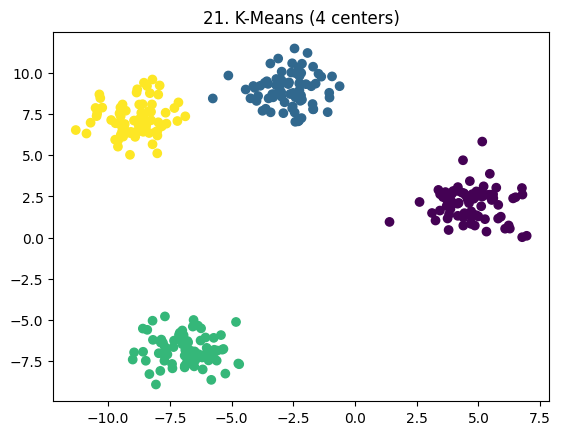

In [31]:
# 21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot.
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
model = KMeans(n_clusters=4, n_init='auto').fit(X)
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap='viridis')
plt.title("21. K-Means (4 centers)")
plt.show()

In [32]:
# 22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels.
iris = load_iris()
model = AgglomerativeClustering(n_clusters=3).fit(iris.data)
print("22. First 10 labels:", model.labels_[:10])

22. First 10 labels: [1 1 1 1 1 1 1 1 1 1]


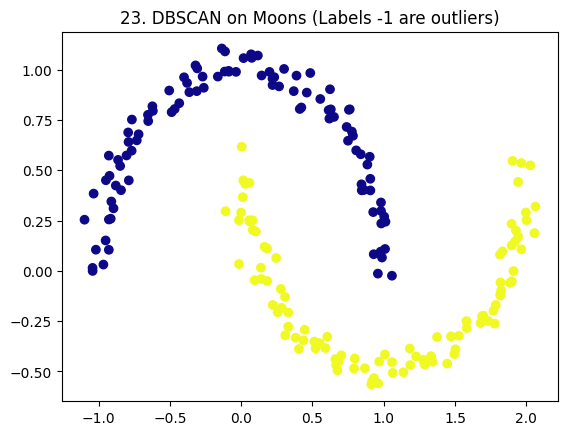

In [33]:
# 23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)
model = DBSCAN(eps=0.2, min_samples=5).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap='plasma')
plt.title("23. DBSCAN on Moons (Labels -1 are outliers)")
plt.show()

In [34]:
# 24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster.
wine = load_wine()
X_scaled = StandardScaler().fit_transform(wine.data)
model = KMeans(n_clusters=3, n_init='auto').fit(X_scaled)
print("24. Cluster counts:", pd.Series(model.labels_).value_counts().to_dict())

24. Cluster counts: {2: 64, 1: 63, 0: 51}


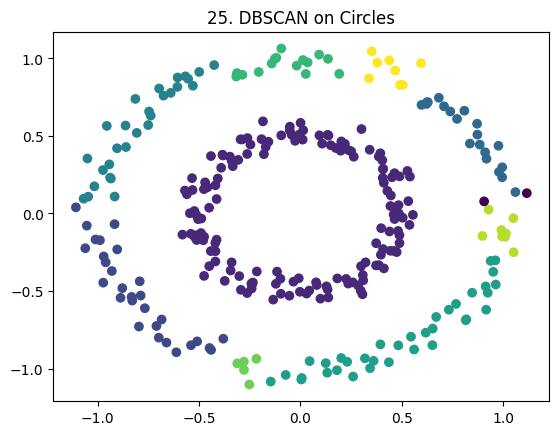

In [35]:
# 25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)
model = DBSCAN(eps=0.15, min_samples=5).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)
plt.title("25. DBSCAN on Circles")
plt.show()

In [36]:
# 26. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids.
bc = load_breast_cancer()
X_scaled = MinMaxScaler().fit_transform(bc.data)
model = KMeans(n_clusters=2, n_init='auto').fit(X_scaled)
print("26. Centroids shape:", model.cluster_centers_.shape)

26. Centroids shape: (2, 30)


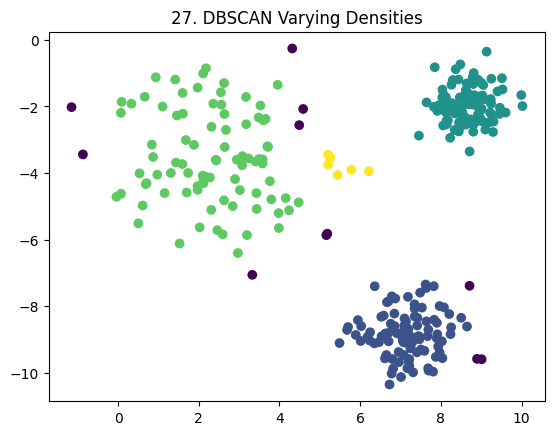

In [37]:
# 27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN.
X, _ = make_blobs(n_samples=300, cluster_std=[0.5, 1.5, 0.7])
model = DBSCAN(eps=0.8, min_samples=5).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)
plt.title("27. DBSCAN Varying Densities")
plt.show()

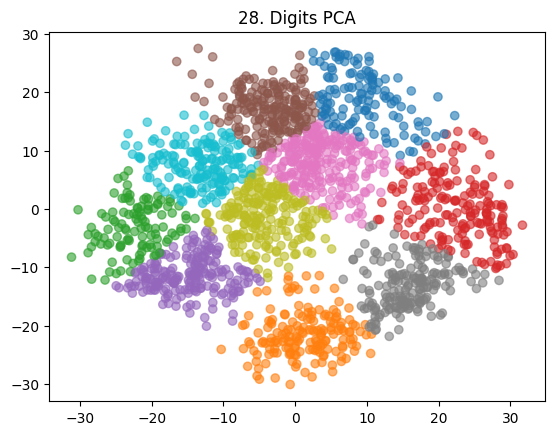

In [38]:
# 28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means.
digits = load_digits()
X_pca = PCA(n_components=2).fit_transform(digits.data)
model = KMeans(n_clusters=10, n_init='auto').fit(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=model.labels_, cmap='tab10', alpha=0.6)
plt.title("28. Digits PCA")
plt.show()

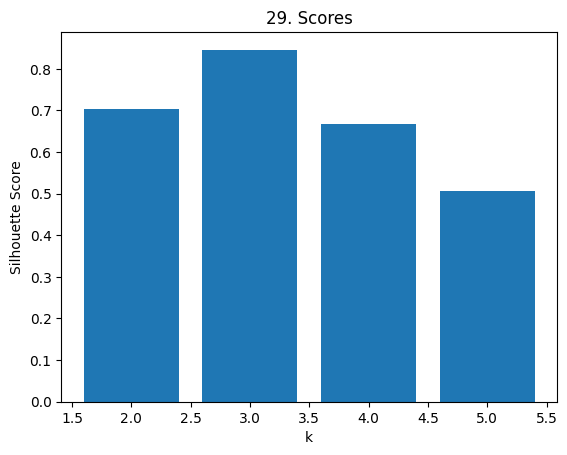

In [39]:
# 29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart.
X, _ = make_blobs(n_samples=400, centers=3, random_state=42)
scores = [silhouette_score(X, KMeans(n_clusters=k, n_init='auto').fit(X).labels_) for k in range(2,6)]
plt.bar(range(2,6), scores)
plt.xlabel('k'); plt.ylabel('Silhouette Score'); plt.title("29. Scores")
plt.show()

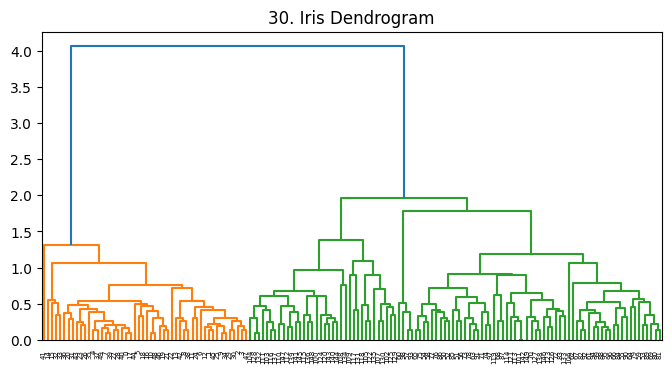

In [40]:
# 30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage.
Z = linkage(iris.data, 'average')
plt.figure(figsize=(8, 4))
dendrogram(Z)
plt.title("30. Iris Dendrogram")
plt.show()

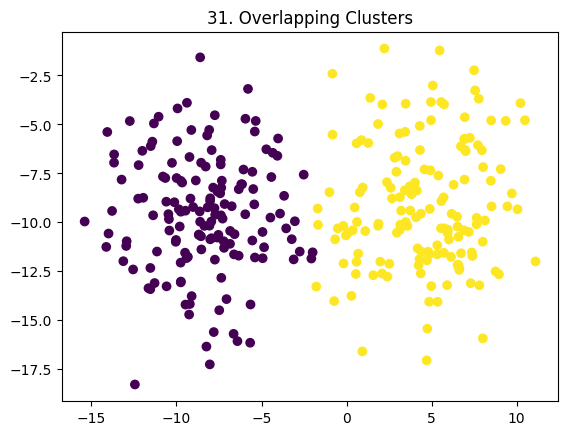

In [41]:
# 31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries.
X, _ = make_blobs(n_samples=300, centers=2, cluster_std=3.0)
model = KMeans(n_clusters=2, n_init='auto').fit(X)
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)
plt.title("31. Overlapping Clusters")
plt.show()

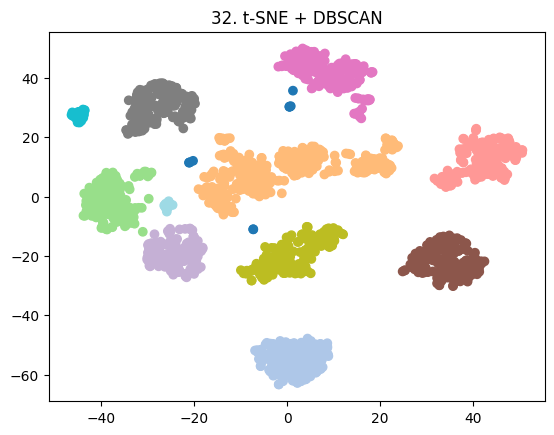

In [42]:
# 32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results.
X_tsne = TSNE(n_components=2).fit_transform(digits.data)
model = DBSCAN(eps=4, min_samples=10).fit(X_tsne)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=model.labels_, cmap='tab20')
plt.title("32. t-SNE + DBSCAN")
plt.show()

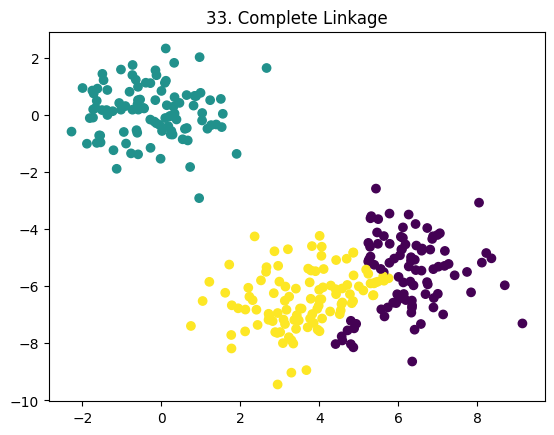

In [43]:
# 33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result.
X, _ = make_blobs(n_samples=300, centers=3)
model = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(X)
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)
plt.title("33. Complete Linkage")
plt.show()

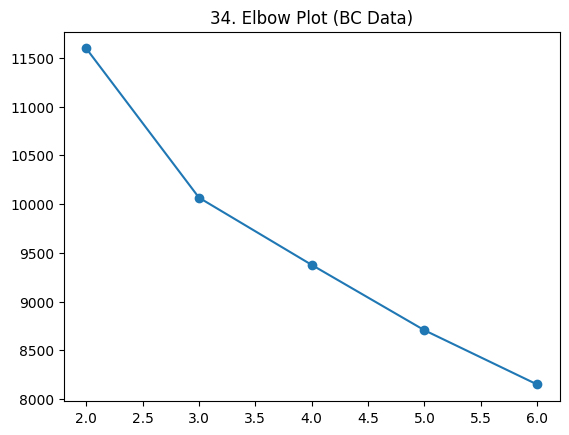

In [44]:
# 34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot.
X_scaled = StandardScaler().fit_transform(bc.data)
inertias = [KMeans(n_clusters=k, n_init='auto').fit(X_scaled).inertia_ for k in range(2, 7)]
plt.plot(range(2, 7), inertias, marker='o')
plt.title("34. Elbow Plot (BC Data)")
plt.show()

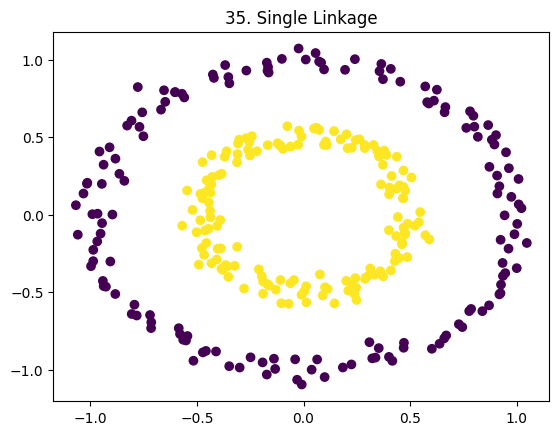

In [45]:
# 35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage.
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)
model = AgglomerativeClustering(n_clusters=2, linkage='single').fit(X)
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)
plt.title("35. Single Linkage")
plt.show()

In [46]:
# 36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise).
X_scaled = StandardScaler().fit_transform(wine.data)
model = DBSCAN(eps=2.5, min_samples=5).fit(X_scaled)
print("36. Clusters:", len(set(model.labels_)) - (1 if -1 in model.labels_ else 0))

36. Clusters: 1


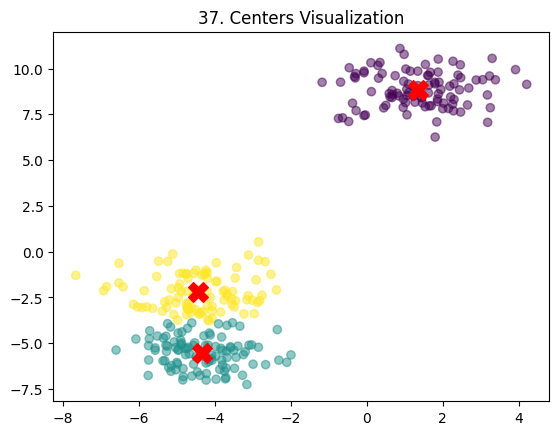

In [47]:
# 37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points.
X, _ = make_blobs(n_samples=300, centers=3)
model = KMeans(n_clusters=3, n_init='auto').fit(X)
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, alpha=0.5)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title("37. Centers Visualization")
plt.show()

In [48]:
# 38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.
model = DBSCAN(eps=0.5, min_samples=5).fit(iris.data)
print("38. Noise count:", list(model.labels_).count(-1))

38. Noise count: 17


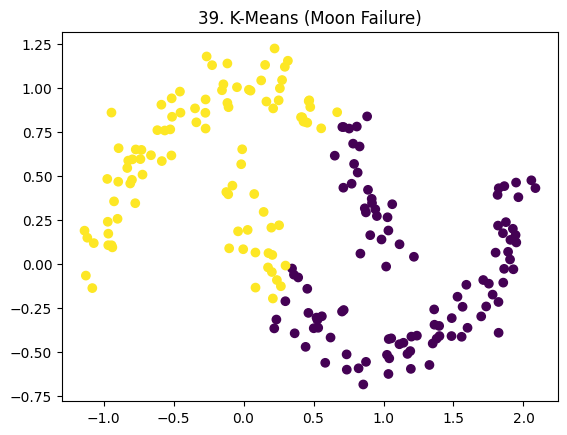

In [49]:
# 39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result.
X, _ = make_moons(n_samples=200, noise=0.1)
model = KMeans(n_clusters=2, n_init='auto').fit(X)
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)
plt.title("39. K-Means (Moon Failure)")
plt.show()

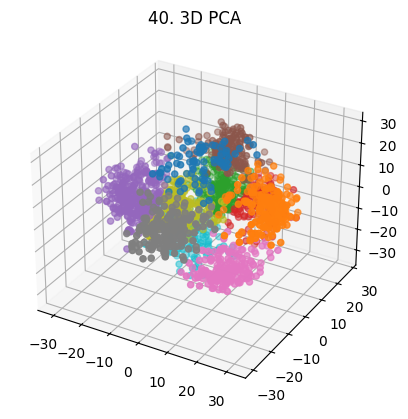

In [50]:
# 40. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.
X_3d = PCA(n_components=3).fit_transform(digits.data)
model = KMeans(n_clusters=10, n_init='auto').fit(X_3d)
fig = plt.figure(); ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=model.labels_, cmap='tab10')
plt.title("40. 3D PCA")
plt.show()

In [51]:
# 41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering.
X, _ = make_blobs(n_samples=500, centers=5)
model = KMeans(n_clusters=5, n_init='auto').fit(X)
print("41. Score:", silhouette_score(X, model.labels_))

41. Score: 0.6987346660760341


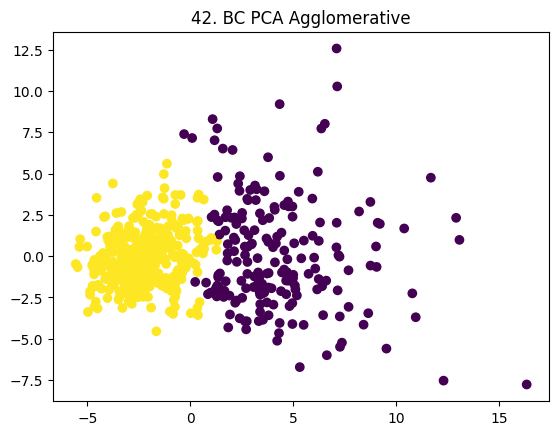

In [52]:
# 42. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D.
X_scaled = StandardScaler().fit_transform(bc.data)
X_pca = PCA(n_components=2).fit_transform(X_scaled)
model = AgglomerativeClustering(n_clusters=2).fit(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=model.labels_)
plt.title("42. BC PCA Agglomerative")
plt.show()

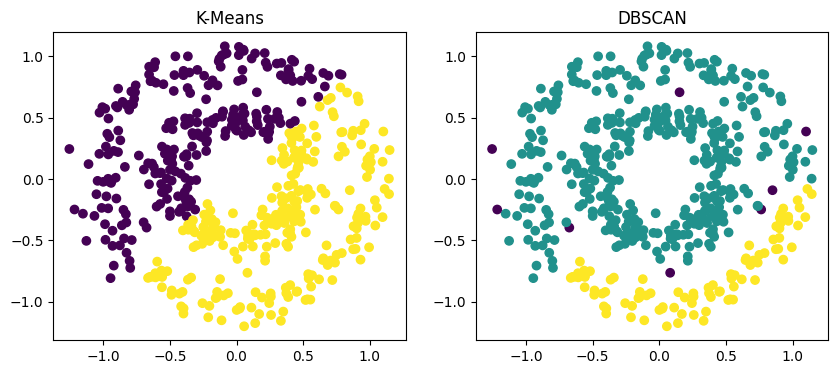

In [53]:
# 43. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side.
X, _ = make_circles(n_samples=500, factor=0.5, noise=0.1)
km = KMeans(n_clusters=2, n_init='auto').fit(X)
db = DBSCAN(eps=0.15, min_samples=5).fit(X)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.scatter(X[:, 0], X[:, 1], c=km.labels_); ax1.set_title("K-Means")
ax2.scatter(X[:, 0], X[:, 1], c=db.labels_); ax2.set_title("DBSCAN")
plt.show()

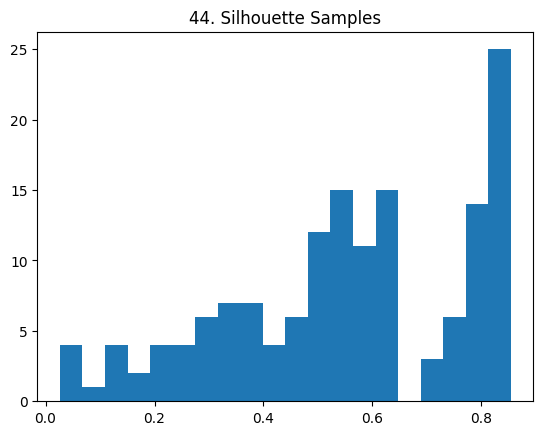

In [54]:
# 44. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering.
model = KMeans(n_clusters=3, n_init='auto').fit(iris.data)
vals = silhouette_samples(iris.data, model.labels_)
plt.hist(vals, bins=20); plt.title("44. Silhouette Samples"); plt.show()

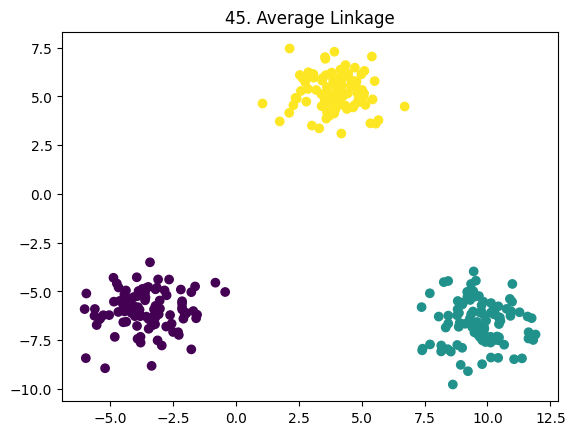

In [55]:
# 45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters.
X, _ = make_blobs(n_samples=300, centers=3)
model = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X)
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)
plt.title("45. Average Linkage")
plt.show()

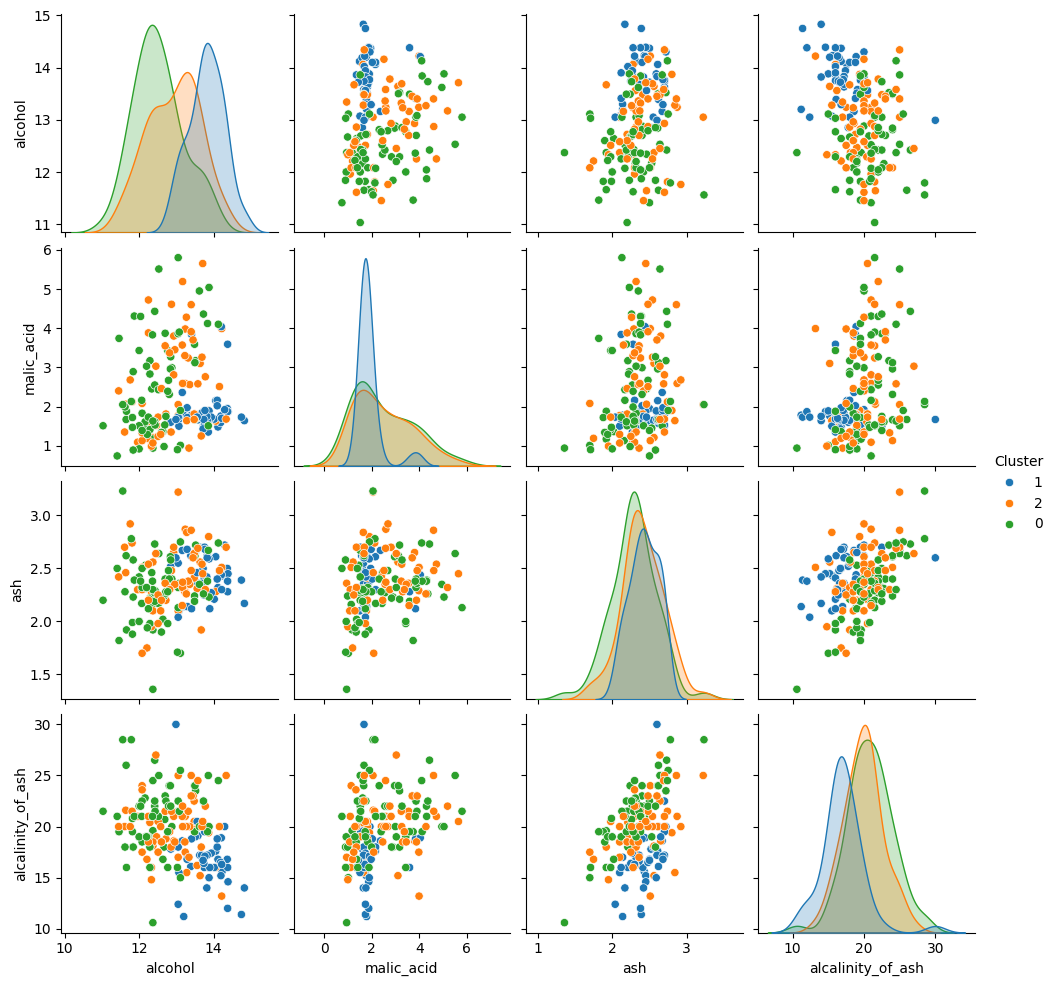

In [56]:
# 46. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features).
df = pd.DataFrame(wine.data[:, :4], columns=wine.feature_names[:4])
df['Cluster'] = KMeans(n_clusters=3, n_init='auto').fit(wine.data).labels_.astype(str)
sns.pairplot(df, hue='Cluster'); plt.show()

In [57]:
# 47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count.
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=2.0)
model = DBSCAN(eps=1.0, min_samples=5).fit(X)
print("47. Counts:", pd.Series(model.labels_).value_counts().to_dict())

47. Counts: {0: 275, -1: 25}


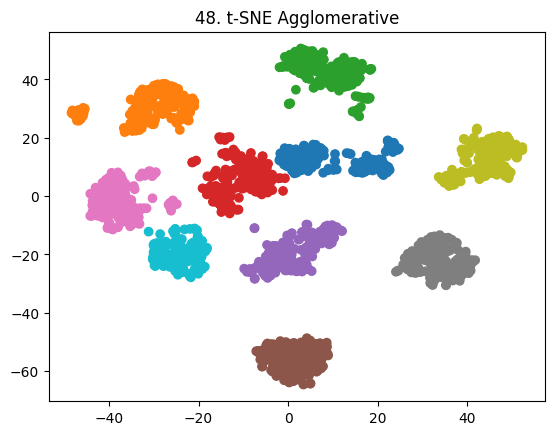

In [58]:
# 48. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.
X_tsne = TSNE(n_components=2).fit_transform(digits.data)
model = AgglomerativeClustering(n_clusters=10).fit(X_tsne)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=model.labels_, cmap='tab10')
plt.title("48. t-SNE Agglomerative")
plt.show()